In [129]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Fetch the data for the past year
ticker_symbol = "ZOMATO.NS"
start_date = pd.Timestamp.now() - pd.Timedelta(days=1000)
end_date = pd.Timestamp.now()
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate features
data['avg_prev_7_days'] = data['Close'].rolling(window=7).mean().shift(1)
data['avg_prev_30_days'] = data['Close'].rolling(window=30).mean().shift(1)

# Create target labels
data['Price_Up'] = (data['Close'] > data['Close'].shift(1)).astype(float)
data['Price_Change'] = data['Close'].diff().shift(1)
data['Price_Change7'] = data['Close'].rolling(window=7).mean().diff().shift(1)
data['Price_Change30'] = data['Close'].rolling(window=30).mean().diff().shift(1)
# Drop NaN values
data.dropna(inplace=True)

# Select features and target
X = data[['avg_prev_7_days', 'avg_prev_30_days','Price_Change','Price_Change7','Price_Change30']]
y = data['Price_Up']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




[*********************100%%**********************]  1 of 1 completed


Accuracy: 0.453125


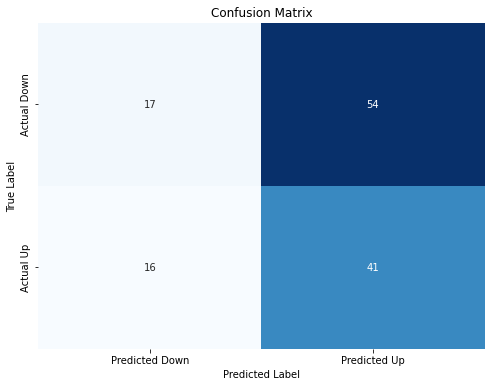

In [130]:
# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_prob = linear_reg.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False, 
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [131]:
 # Train the model with logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.453125


Accuracy: 0.5234375


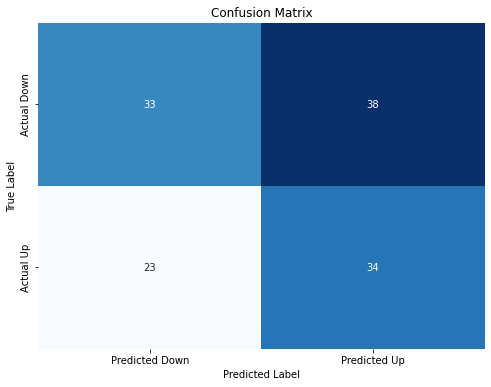

In [132]:
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=5000, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False, 
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.4453125


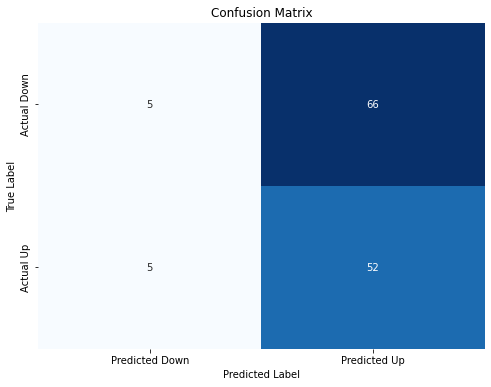

In [133]:
#using svm
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False, 
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()